### RMF Clustering
Estratégia para segmentar cliente

##### Dataset

In [1]:
#pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../dataframes/uen/df_cliente_setor_veiculo_digital.csv')


In [4]:
df.head(10)

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,AD AUGUSTA PER ANGUSTA LTDA - EPP,SERVICOS,INTERNET,204.00,120.00,120.00,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,ADRIANA HERZOG SIMOES,SERVICOS,INTERNET,255.00,125.00,125.00,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,AEROPORTOS DO SUDESTE DO BRASIL S.A,SERVICOS,INTERNET,1581.00,526.00,526.00,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,AGROLAB A. E CONTROLE DE QUALIDADE LTDA,PREST DE SERVICOS,INTERNET,204.00,180.00,180.00,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,AGROPECUÁRIA PEDRA DA LORENA S/A,SERVICOS,INTERNET,1530.00,1220.50,976.40,1.1,84.25384,95.01804,87.06581,97.86726,1
5,2020-01-31,AGUIA BRANCA PARTICIPACOES S/A,OUTROS MEIOS TRANSPORTE/AFINS,INTERNET,1377.00,806.00,806.00,1.1,84.25384,95.01804,87.06581,97.86726,1
6,2020-01-31,AKQUA PUBL. MARKETING. E CONSULTORIA LTD,PREST DE SERVICOS,INTERNET,3000.00,1500.00,1200.00,1.1,84.25384,95.01804,87.06581,97.86726,1
7,2020-01-31,AMBIPAR ENVIR. SOLUTIONS- SOL. AMB. LTDA,CONSTRUTORAS E IMOB.,INTERNET,612.00,450.00,450.00,1.1,84.25384,95.01804,87.06581,97.86726,1
8,2020-01-31,AMG ENGENHARIA LTDA,CONSTRUTORAS E IMOB.,INTERNET,306.00,160.00,160.00,1.1,84.25384,95.01804,87.06581,97.86726,1
9,2020-01-31,APPNEXUS LATIN A.TEC.EM PUBLICIDADE LTDA,PREST DE SERVICOS,INTERNET,1281.21,1281.21,1281.21,1.1,84.25384,95.01804,87.06581,97.86726,1


In [5]:
#To calculate the Recency value, we need to find the last invoice date in our dataset.
df.Data.max()

'2024-06-30'

In [6]:
#Agregar por coluna de cliente e data so.
df.head()

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,AD AUGUSTA PER ANGUSTA LTDA - EPP,SERVICOS,INTERNET,204.0,120.0,120.0,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,ADRIANA HERZOG SIMOES,SERVICOS,INTERNET,255.0,125.0,125.0,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,AEROPORTOS DO SUDESTE DO BRASIL S.A,SERVICOS,INTERNET,1581.0,526.0,526.0,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,AGROLAB A. E CONTROLE DE QUALIDADE LTDA,PREST DE SERVICOS,INTERNET,204.0,180.0,180.0,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,AGROPECUÁRIA PEDRA DA LORENA S/A,SERVICOS,INTERNET,1530.0,1220.5,976.4,1.1,84.25384,95.01804,87.06581,97.86726,1


In [7]:
# Convertendo a coluna 'Data' para o formato de data, se necessário
#df['Data'] = pd.to_datetime(df['Data'])
#
## Definindo a coluna 'Data' como índice
#df.set_index('Data', inplace=True)

In [8]:
df['Data'] = pd.to_datetime(df['Data'])


In [9]:
df.set_index('Data', inplace=True)


In [10]:
df['Total Ocorrencias Cliente'] = df.groupby('Cliente')['Cliente'].transform('size')

df_cliente = df.groupby([pd.Grouper(freq='ME'), 'Cliente']).agg({
    'Vl Liquido Final': 'sum',
    'Taxa Ac. TRI % PIB': 'mean',
    'Total Ocorrencias Cliente': 'count'
}).reset_index()


In [11]:
df_cliente.shape

(10992, 5)

In [12]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,AD AUGUSTA PER ANGUSTA LTDA - EPP,120.0,1.1,1
1,2020-01-31,ADRIANA HERZOG SIMOES,125.0,1.1,1
2,2020-01-31,AEROPORTOS DO SUDESTE DO BRASIL S.A,526.0,1.1,1
3,2020-01-31,AGROLAB A. E CONTROLE DE QUALIDADE LTDA,180.0,1.1,1
4,2020-01-31,AGROPECUÁRIA PEDRA DA LORENA S/A,976.4,1.1,1


In [13]:
df_cliente.Data.max()

Timestamp('2024-06-30 00:00:00')

In [14]:
import datetime as dt


##### RMF Segregate levels

In [15]:
pin_date = dt.datetime(2024, 6, 30)

In [16]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,AD AUGUSTA PER ANGUSTA LTDA - EPP,120.0,1.1,1
1,2020-01-31,ADRIANA HERZOG SIMOES,125.0,1.1,1
2,2020-01-31,AEROPORTOS DO SUDESTE DO BRASIL S.A,526.0,1.1,1
3,2020-01-31,AGROLAB A. E CONTROLE DE QUALIDADE LTDA,180.0,1.1,1
4,2020-01-31,AGROPECUÁRIA PEDRA DA LORENA S/A,976.4,1.1,1


In [17]:
rfm = df_cliente.groupby('Cliente').agg({'Data': lambda Data: (pin_date - Data.max()).days,
                                     'Total Ocorrencias Cliente': lambda Invoice: Invoice.nunique(),
                                     'Vl Liquido Final': lambda Amount: Amount.sum()})

In [18]:
rfm.head()

,Data,Total Ocorrencias Cliente,Vl Liquido Final
Cliente,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0
2B PROJETOS LTDA,243,1,180.0
2RC VISTORIA VEICULAR LTDA,1430,1,600.0


In [19]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
Cliente,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0
2B PROJETOS LTDA,243,1,180.0
2RC VISTORIA VEICULAR LTDA,1430,1,600.0


In [20]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)

In [21]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,1,1,3,5
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,5,1,2,8
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,4,1,1,6
2B PROJETOS LTDA,243,1,180.0,4,1,1,6
2RC VISTORIA VEICULAR LTDA,1430,1,600.0,1,1,3,5


In [22]:
rfm[rfm['score']== 15].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
ARCELORMITTAL BRASIL S.A.,0,2,2104610.04,5,5,5,15
SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,0,1,1849328.46,5,5,5,15
"SECRETARIA DE ESTADO DA AGRICULTURA, ABA",0,1,1561270.41,5,5,5,15
BANESTES SA BANCO DO ESTADO DO ESPIRITO,0,2,1202666.35,5,5,5,15
UNIMED VITORIA COOPERATIVA DE TRABALHO M,0,1,919259.86,5,5,5,15


In [23]:
rfm[rfm['score']==15].count()
#There are 148 best clients in the company who are frequent buyers, and also generate high revenue

recency            67
frequency          67
monetary           67
recency_score      67
frequency_score    67
monetary_score     67
score              67
dtype: int64

In [24]:
def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Inactive'
    elif ((score >3) and (score < 8)):
        return 'Average'
    elif ((score > 7) and (score <11)):
        return 'Good'
    else:
        return 'Active'

In [25]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,1,1,3,5,Average
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,5,1,2,8,Good
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,4,1,1,6,Average
2B PROJETOS LTDA,243,1,180.0,4,1,1,6,Average
2RC VISTORIA VEICULAR LTDA,1430,1,600.0,1,1,3,5,Average


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

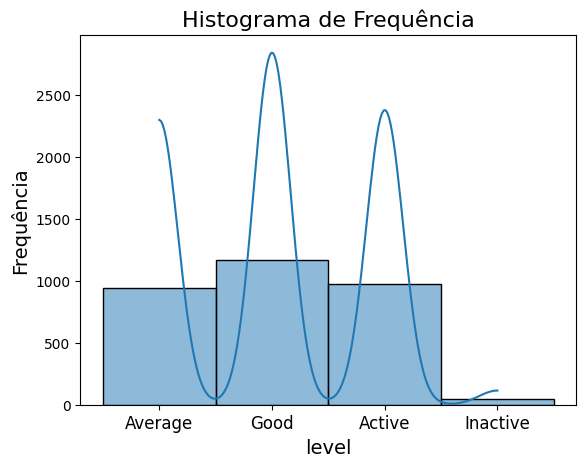

In [27]:
sns.histplot(rfm['level'], bins=30, kde=True)
sns.set_context("notebook", font_scale=1.5)
plt.title('Histograma de Frequência', fontsize = 16)
plt.xlabel('level',fontsize = 14)
plt.ylabel('Frequência',fontsize = 14)

plt.xticks(fontsize=12)  # Tamanho da fonte dos números no eixo X
plt.yticks(fontsize=10)  # Tamanho da fonte das strings no eixo Y

plt.show()

In [28]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency             frequency              monetary        \
                 mean   min   max      mean min max          mean   min   
level                                                                     
Active     266.183402     0  1461  1.013320   1   3  50627.636301  55.0   
Average   1025.975610     0  1612  1.000000   1   1    660.978897  16.8   
Good       610.937393     0  1612  1.000858   1   2   4615.562298  50.4   
Inactive  1389.191489  1157  1612  1.000000   1   1    142.473191  19.2   

                            
                 max count  
level                       
Active    2132998.16   976  
Average     18348.00   943  
Good       426124.07  1166  
Inactive      180.00    47

Active Customers
We can say that 745 customers bought 62.407,57 units by shopping 2.10 times approximately every 218.81 days.

They are previliged customers.

Surprise offers can be given on birthdays and anniversary.

Good Customers
We can say that 751 customers bought 7507.89 units by shopping 1.17 times approximately every 545.52 days.

Avarage Customers
We can say that 786 customers bought 2467.45 units by shopping 1.00 times approximately every 980.41 days.
Tiered pricing of products can be introduced.


Inactive Customers
We can say that 27 customers bought 699.10 units by shopping 1.00 times approximately every 1357.92 days

Personalised emails and SMS can be sent to the customers regarding the offers.
More marketing strategies can be introduced to improve the frequency of orders.

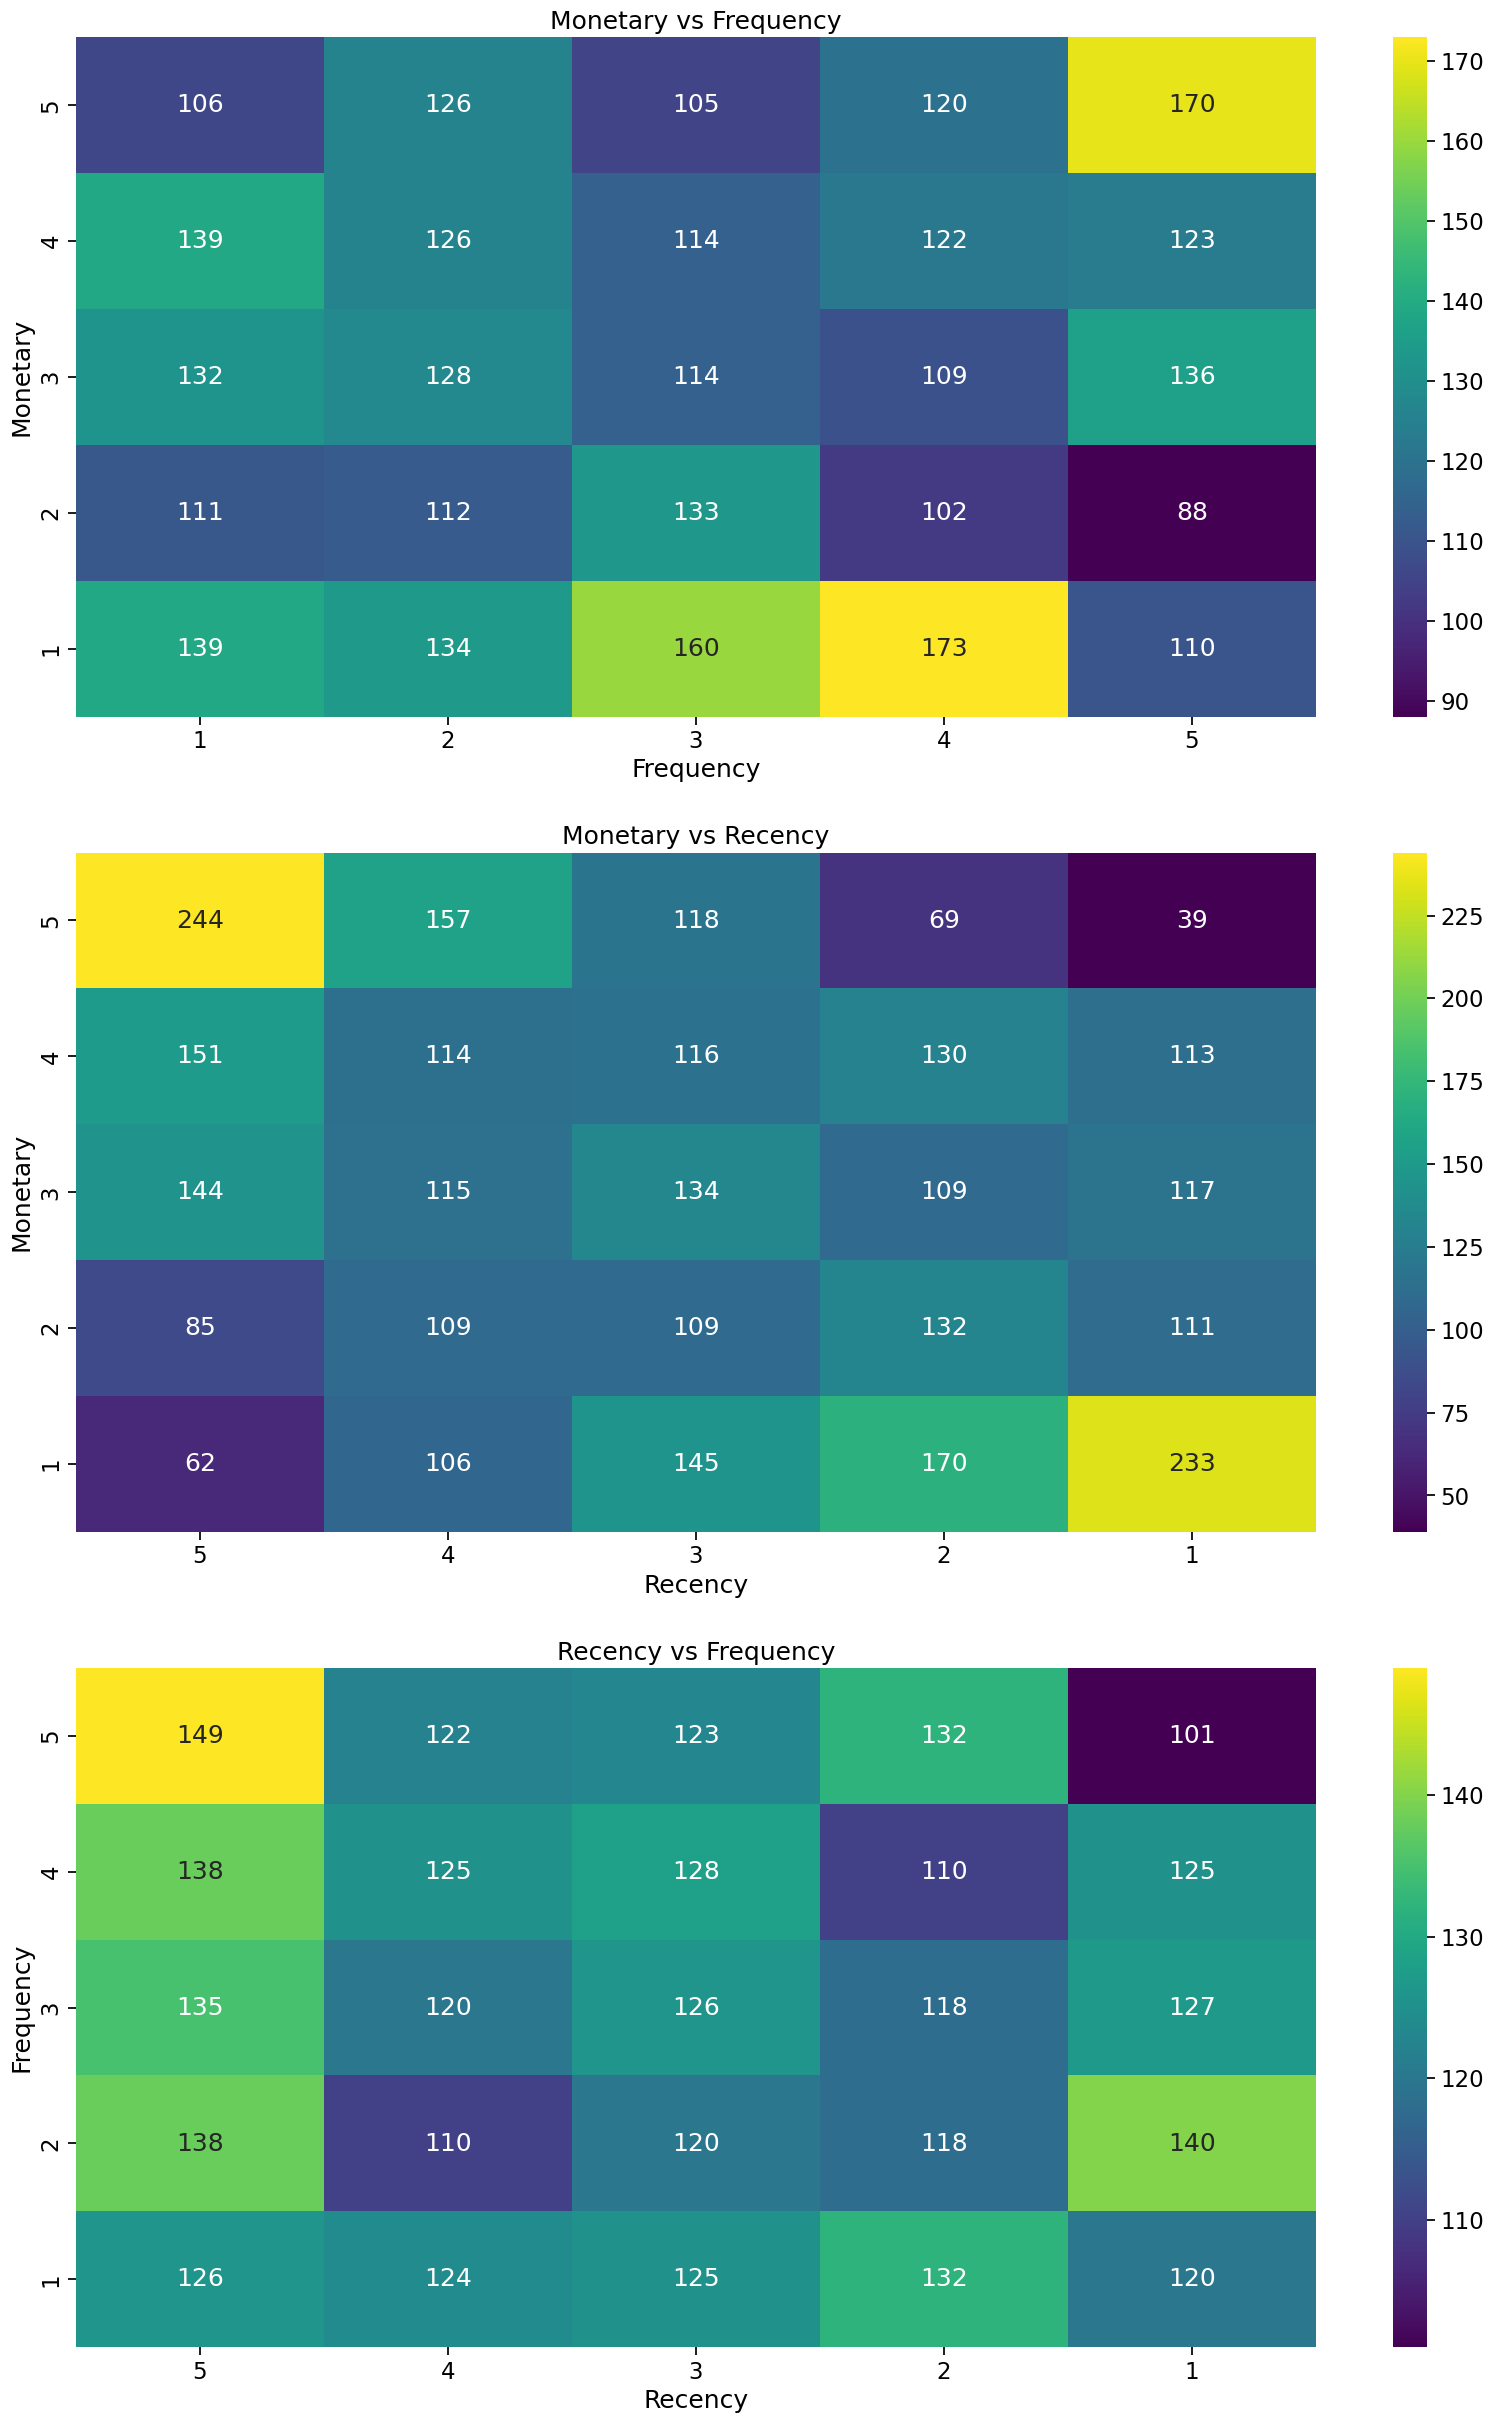

In [29]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

##### RMF Clustering

In [30]:
rfm.describe()

,recency,frequency,monetary,score
count,3132.000000,3132.000000,3.132000e+03,3132.000000
mean,640.145275,1.004470,1.769614e+04,9.011814
std,476.428787,0.071346,1.054640e+05,2.776720
min,0.000000,1.000000,1.680000e+01,3.000000
25%,182.000000,1.000000,2.040000e+02,7.000000
50%,608.000000,1.000000,7.800000e+02,9.000000
75%,1034.000000,1.000000,5.000000e+03,11.000000
max,1612.000000,3.000000,2.132998e+06,15.000000


In [31]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,1,1,3,5,Average
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,5,1,2,8,Good
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,4,1,1,6,Average
2B PROJETOS LTDA,243,1,180.0,4,1,1,6,Average
2RC VISTORIA VEICULAR LTDA,1430,1,600.0,1,1,3,5,Average


In [32]:
pip install scikit-learn yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
rfm_standard_scaler=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_standard_scaler)
x_scaled = scaler.fit_transform(rfm_standard_scaler)
x_scaled

array([[ 1.08502524, -0.06266256, -0.16219821],
       [-1.21579083, -0.06266256, -0.16588537],
       [-0.83372101, -0.06266256, -0.16658714],
       ...,
       [-0.06748208, -0.06266256,  0.0194776 ],
       [-1.15281229, -0.06266256, -0.16611297],
       [-0.64058682, -0.06266256, -0.16611297]])

In [35]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [37]:
pip install setuptools


In [38]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

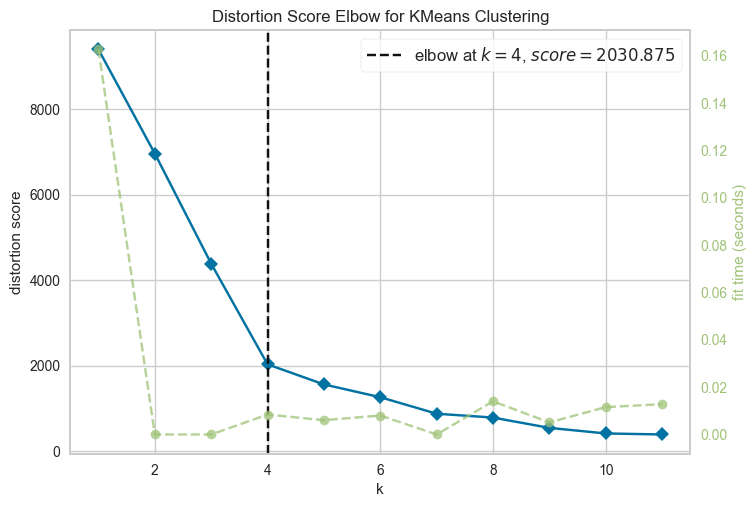

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()  

[0 0 0 ... 0 0 0]
 Our cluster centers are as follows
[[ 9.59338356e-01 -6.26625620e-02 -1.39286909e-01]
 [-7.84056976e-01 -6.26625620e-02  7.57447955e-04]
 [-9.31433175e-01  1.52302578e+01  3.45561005e-01]
 [-1.26647357e+00 -6.26625620e-02  1.14886440e+01]
 [-1.34384720e+00  1.39558477e+01  1.55143289e+01]]


,recency,frequency,monetary
cluster_pred,,,
0,1414,1414,1414
1,1691,1691,1691
2,11,11,11
3,14,14,14
4,2,2,2


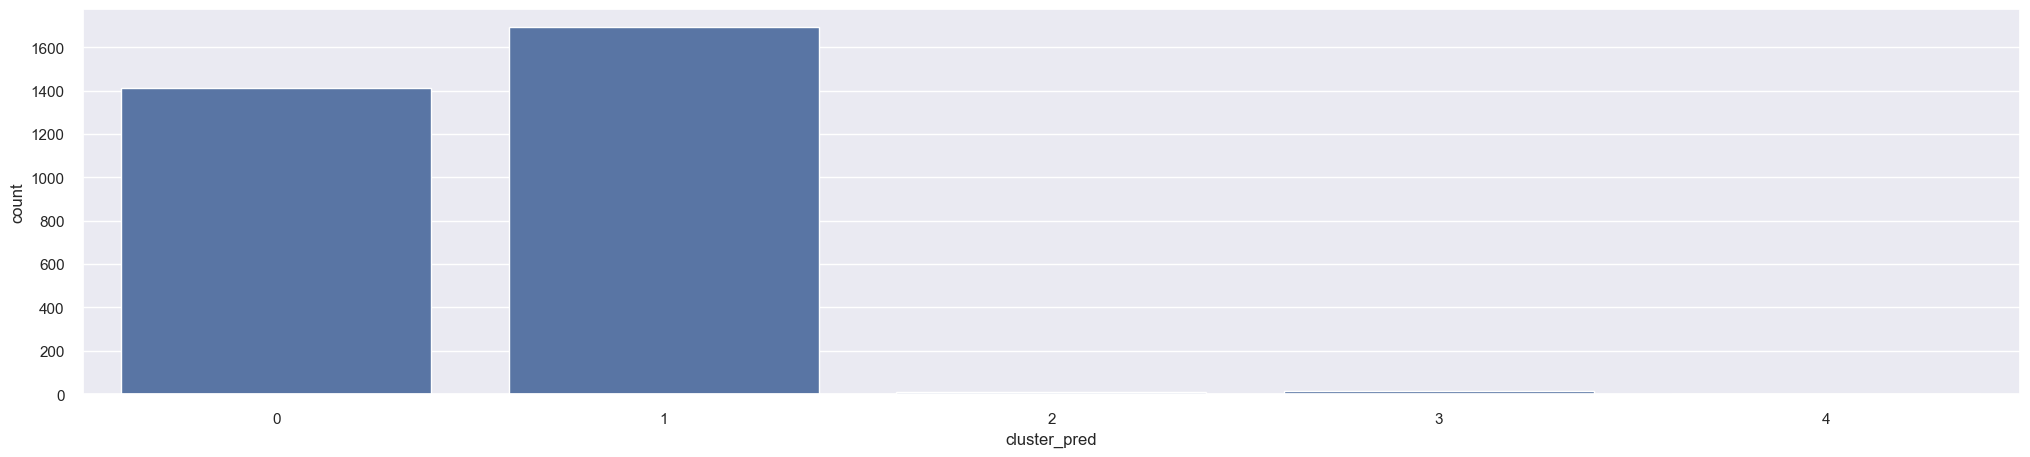

In [41]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm_standard_scaler)
clusters_scaled = rfm_standard_scaler.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

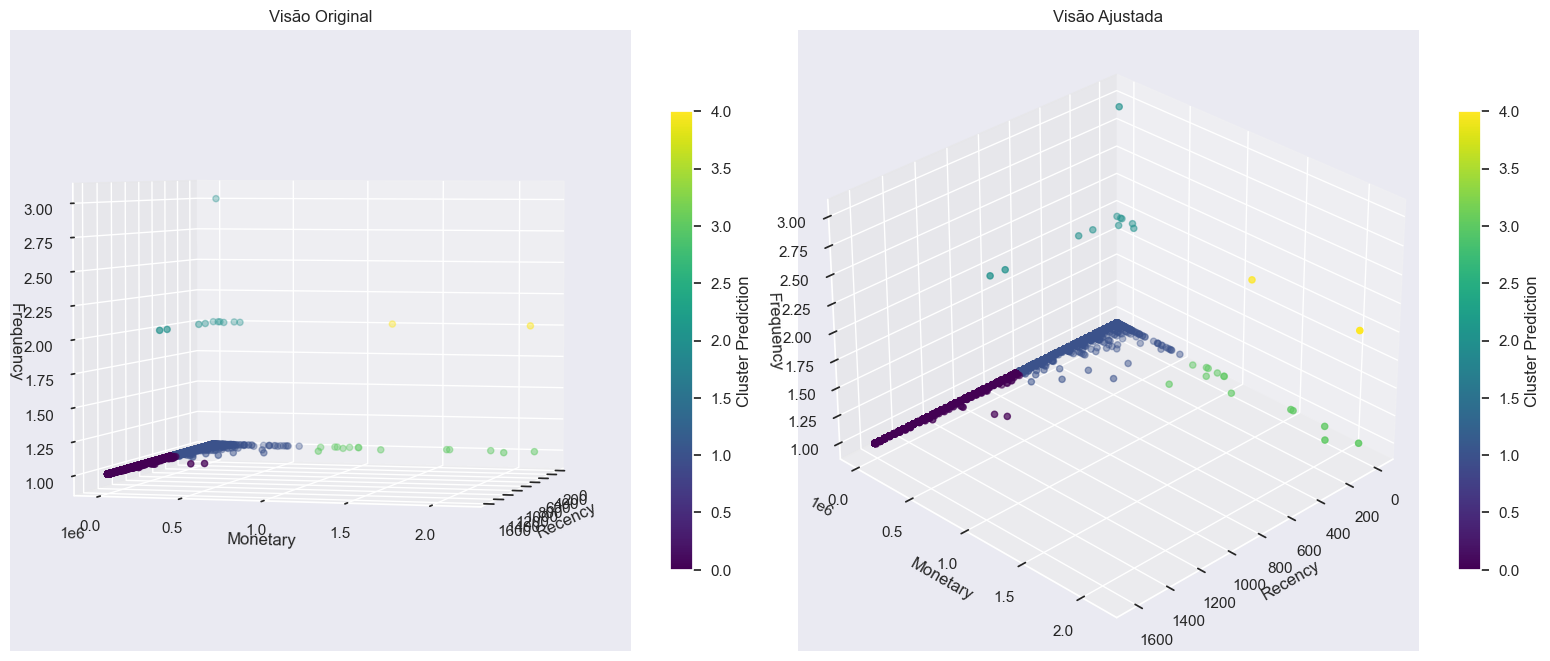

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Cria a figura e os subplots, com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(16, 8))

# Dados dos eixos
xline = clusters_scaled['recency']
yline = clusters_scaled['frequency']
zline = clusters_scaled['monetary']

# Gráfico 1 (idêntico ao original)
scatter1 = ax1.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')
ax1.set_zlabel('Frequency')
ax1.view_init(3, 15)  # Manter o ângulo de visão original
ax1.set_title('Visão Original')

# Gráfico 2 (com ângulo de visão alterado)
scatter2 = ax2.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Monetary')
ax2.set_zlabel('Frequency')
ax2.view_init(30, 45)  # Ângulo de visão ajustado para melhor visualização
ax2.set_title('Visão Ajustada')

# Adicionar barras de cores
cbar1 = fig.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Prediction')

cbar2 = fig.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Prediction')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_scaled, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5032208844748185


In [44]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(x_scaled, identified_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 1.3918868299916944


In [45]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(x_scaled, identified_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Calinski-Harabasz Index: 407.27903852297254


In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [47]:
rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
rfm_standard_scaler['level']=rfm['level']

rfm_standard_scaler.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

C:\Users\Raul\AppData\Local\Temp\ipykernel_32408\2934273416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
C:\Users\Raul\AppData\Local\Temp\ipykernel_32408\2934273416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['level']=rfm['level']


recency            frequency              monetary              \
                mean  min   max      mean min max          mean         min   
cluster                                                                       
0        1097.128713  700  1612  1.000000   1   1  3.008732e+03       16.80   
1         266.657599    0   700  1.000000   1   1  1.777601e+04       50.40   
2         196.454545    0   853  2.090909   2   3  5.413457e+04      540.00   
3          36.857143    0   243  1.000000   1   1  1.229141e+06   736852.00   
4           0.000000    0     0  2.000000   2   2  1.653638e+06  1202666.35   

                           
                max count  
cluster                    
0         350631.47  1414  
1         582084.10  1691  
2         195494.93    11  
3        2132998.16    14  
4        2104610.04     2

##### K means analisys

In [48]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,1,1,3,5,Average
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,5,1,2,8,Good
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,4,1,1,6,Average
2B PROJETOS LTDA,243,1,180.0,4,1,1,6,Average
2RC VISTORIA VEICULAR LTDA,1430,1,600.0,1,1,3,5,Average


In [49]:
rfm_standard_scaler.head()

,recency,frequency,monetary,cluster,level
Cliente,,,,,
1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,0,Average
14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,1,Good
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,1,Average
2B PROJETOS LTDA,243,1,180.0,1,Average
2RC VISTORIA VEICULAR LTDA,1430,1,600.0,0,Average


In [50]:
rfm_standard_scaler.shape

(3132, 5)

##### Juntando na tabela original

In [51]:
rfm_standard_scaler = rfm_standard_scaler.reset_index().rename(columns={'index': 'Cliente'})


In [52]:
rfm_standard_scaler.head()

,Cliente,recency,frequency,monetary,cluster,level
0,1 OF. R.G.I.T.D.P.J.E P. TIT. C.COLATINA,1157,1,592.8,0,Average
1,14.602.987 PRISCILA BORGES WANDEKOKEN,61,1,204.0,1,Good
2,2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,243,1,130.0,1,Average
3,2B PROJETOS LTDA,243,1,180.0,1,Average
4,2RC VISTORIA VEICULAR LTDA,1430,1,600.0,0,Average


In [53]:
df_combinado = df.merge(rfm_standard_scaler[['Cliente', 'cluster']], on='Cliente', how='left')
df_combinado.sample(10)

,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente,Total Ocorrencias Cliente,cluster
10787,VITAL BRASIL CHEMICAL I.C. P. Q. LTDA,LOJA VAREJISTA/ATAC,INTERNET,180.00,180.00,180.00,2.5,NaN,NaN,NaN,NaN,1,4,1
965,PREFEITURA MUNICIPAL DE VILA VALERIO,SERVICOS PUBLICOS,INTERNET,2218.50,1431.15,1431.15,-2.8,89.13238,99.06405,88.73469,99.56395,1,4,0
8326,SENAT SERV.NAC.APRENDIZAGEM TRANSPORTE,CURSO APRENDIZAGEM,INTERNET,1775.00,437.50,437.50,3.7,97.84923,98.26606,101.93698,101.27941,1,32,1
9120,FUNDACAO RENOVA,PREST DE SERVICOS,INTERNET,56190.00,56190.00,56190.00,2.9,97.30310,101.61504,100.15150,102.59674,1,15,3
4427,EMPRESA LUZ E FORCA SANTA MARIA S A,SERVICOS PUBLICOS,INTERNET,4476.85,2115.44,1841.78,4.8,119.56136,122.78603,98.24259,98.54126,1,28,1
5334,RIO DOURO PREST SERVIC ADMINISTRATIVOS L,PREST DE SERVICOS,INTERNET,1122.00,660.00,660.00,2.7,97.10915,96.98576,101.20755,100.48572,1,35,1
8910,KORA SAUDE PARTICIPACOES S.A,LOJA VAREJISTA/ATAC,INTERNET,7600.00,3800.00,3040.00,3.1,99.14880,100.19568,100.43630,102.80546,1,4,2
1623,UNILETRA CORRET DE CAMBIO TIT. E VLR MOB,BANCOS/FINANC.INSTIT,INTERNET,1530.00,1071.00,856.80,-3.3,99.50737,105.88980,96.57693,104.42429,1,7,1
4488,MUNICIPIO DE FUNDAO,SERVICOS PUBLICOS,INTERNET,1020.00,54.32,54.32,4.8,119.56136,122.78603,98.24259,98.54126,1,46,1
4207,INSTITUTO DE FOMENTO SOCIAL,PREST DE SERVICOS,INTERNET,4600.00,4600.00,3680.00,4.8,101.93215,105.23216,96.36644,99.23272,1,1,0
